## CS-331: Introduction to Artifical Intelligence
----
## Assignment 2: Linear Regression
## Total Points: 100
----
### Lead TAs:
#### S1: Taimur Hassan Sarmad (23100056@lums.edu.pk)
#### S2: Haseeb Ahmed (23100035@lums.edu.pk)
----
### Instructions:
- The aim of this assignment is to familiarize you with Linear Regression and Multi-varient Linear Regreesion.
- You can only use Python programming language and Jupyter Notebooks.
- Please submit both your jupyter notebook (.ipynb file) and the python script (.py) separately (i.e., you will upload 2 files on LMS). Both files should be renamed as per the following naming convention: PA2_RollNumber.ipynb, PA2_RollNumber.py
- The code MUST be done independently. Any plagiarism or copying of work from others or the internet will be immediately referred to the DC. If you are confused about what constitutes plagiarism, it is YOUR responsibility to consult with the instructor or the TA in a timely manner. No “after the fact” negotiations will be possible. The only way to guarantee that you do not lose marks is “DO NOT LOOK AT ANYONE ELSE'S CODE NOR DISCUSS IT WITH THEM”.
- You are only supposed to write your code in the regions specified! Do NOT change any code that has already been written for you!
- You CANNOT use the scikit learn library to implement any function, unless mentioned otherwise. The entire implementation should be your own!


Credits:
Data: chandanverma07 on Github
Assignment Structure: CS-535 @ LUMS

In [1]:
'''
Add all your import statements here (you may need to install some of these packages 
if you don't already have them. You can do this by using the 'pip3 install' command in 
your terminal. Google it if you get an error and it should be pretty straightforward to solve. 
If the issue persists, please contact a TA!):
'''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

# YOUR CODE HERE #

## Part 1: Linear Regression with one variable

Simple linear Regression assumes a linear relationship between the input varaiable (X) and a single output variable (Y). The output variable can be calculated from a linear combination of the input variable X. 

In this part you will implement simple linear regression to predict the chance of admission of a student into post-graduate school given their CGPA in their undergraduate program. You might end up calculating your chance in your senior year, so make sure to build an accurate model :P

We will begin first by loading the dataset into our notebook visualizing the data points. The first column (your inputs) is CGPA. This CGPA is a little different in that it is out of 10 instead of 4. The second column (your labels) is the chance of getting an admission (Probability between 0-1).


Text(0.5, 1.0, 'CGPA against Chance of Admission')

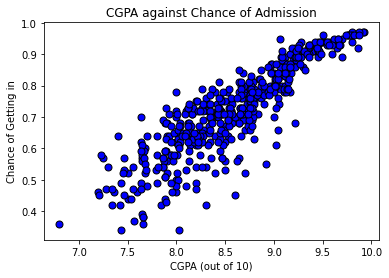

In [2]:
''' DO NOT EDIT '''

# Importing the dataset.
data = np.loadtxt(os.path.join("Data","ex1data.txt") , delimiter=",")
X,Y = data[:,0], data[:,1]

# Plotting the dataset.
plt.plot(X,Y,"bo",ms=7,mec="k")
plt.ylabel("Chance of Getting in")
plt.xlabel("CGPA (out of 10)")
plt.title("CGPA against Chance of Admission")

### Learn the parameters
In this part, you will fit the linear regression parameters $\theta_0$ and $\theta_1$ to the admission dataset.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\hat {y}^{(i)} - y^{(i)}\right)^2$$ 

where the hypothesis $\hat {y}^{(i)}$ is the predicted value for a given x and is given by the linear model and $m$ is the total number of datapoints
$$ \hat {y} =  h_\theta(x) = \theta_0 + \theta_1 x$$ 

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)x^{(i)}$$

With each step of gradient descent, your parameters $\theta_0$ and $\theta_1$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [3]:
def h_x(x,theta0,theta1):
    # YOUR CODE HERE #
    hofx = theta0 + theta1 * x
    return hofx
    

def cost_func(X,Y,theta0,theta1):
    # YOUR CODE HERE #
    m = len(X)
    to_mul = 1/(2*m)
    cost = 0
    var = 0
    for x in X:
        cost = (h_x(x,theta0,theta1) - Y[var])**2 + cost
        var = var+1
    cost = to_mul*cost
    return cost

def gradient_descent(X,Y,alpha,epochs):
    # YOUR CODE HERE #
    J = list() # At each iteration/epoch, append your calculated loss in this list
    
    # Initializing the thetas/weights with 1:
    theta0 = 1 
    theta1 = 1
    m = len(X)
    to_mul = 1/m
    sum_theta0 = 0
    sum_theta1 = 0



    for epoch in range(epochs):
        var = 0
        for x in X:
            sum_theta0 = sum_theta0 + (h_x(x,theta0,theta1) - Y[var])
            sum_theta1 = sum_theta1 + ((h_x(x,theta0,theta1) - Y[var])*x)
            var = var+1

        theta0 = theta0 - alpha*to_mul*sum_theta0
        theta1 = theta1 - alpha*to_mul*sum_theta1

        J.append(cost_func(X,Y,theta0,theta1))
        sum_theta0= 0
        sum_theta1 = 0
   

    return theta0 , theta1 , J

In [4]:
n_epoch = 90000 # Modify as per your model (should be in the range of 1000 - 3000)
alpha = 0.009 # Modify as per your model (should be in the range of 0.001 - 0.1)

theta0, theta1, J = gradient_descent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

Predicted theta0 = -1.0071, theta1 = 0.2016, cost = 0.0022


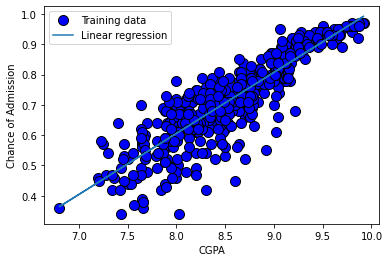

In [5]:
''' DO NOT EDIT ''' 

y_pred_list = list()
for x in X:
    y_pred_list.append(h_x(x, theta0, theta1))
plt.plot(X, Y, 'bo', ms=10, mec='k')
plt.ylabel('Chance of Admission')
plt.xlabel('CGPA')
plt.plot(X, y_pred_list, '-')
plt.legend(['Training data', 'Linear regression'])

Make a prediction.

Convert your CGPA to a cgpa out of 10. Then using your learned values of theta, predict your chance of getting into a Post-Grad Program.

In [6]:
# YOUR CODE HERE # 
cgpa =3.94
cgpa_out_of_10 = cgpa*2.5
print(h_x(cgpa_out_of_10,theta0,theta1))

0.9786789928552482


## Part 2

We will now implement multivarient linear regression using the same dataset with more inputs (X) to predict the same single output (Y).

For this Part we use 5 inputs (GRE Score, TOEFL Score, SOP, LOR and CGPA) to estimate one output variable (Chance of Admit).

In the code segment below, we have read the data from a csv and done some pre-processing. 

In [7]:
''' DO NOT EDIT '''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
data = pd.read_csv('./Data/admissions.csv')
data=data.drop((['Serial No.','University Rating','Research']),axis=1)
data

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,0.87
496,337,117,5.0,5.0,9.87,0.96
497,330,120,4.5,5.0,9.56,0.93
498,312,103,4.0,5.0,8.43,0.73


----
#### Question: View the original CSV data (Either in Excel or import it again here) and explain why did we "Drop/remove" the columns from our analysis. Explain in terms of co-relation.
----

Ans: Getting admitted into a university or having chances of being admitted intoa a university has no correlation with how "high" the university is ranked, because every university wants the best candidate to be admitted, and the university itself is admitting the student into the university so how "highly" it is ranked, has no correlation with them admitting the student as that variable is related to the university's competence, as opposed to every other variable that is related to the STUDENT's competence. Furthermore, experience in research has no effect on the chances of a student's admission into a university as research is almost never the main focus of the academics of a student in a university so there is no co-relation between the competence of the student with research.

----
### Implementation:

- Start by splitting the given pandas dataframe into a test/train split (80/20 split). Be sure to divide X (the data) and Y (the labels) into separate variables. (NOTE: You are NOT allowed to use the library function "train_test_split". You need to write the entire code for the splitting yourself!)
- Convert this data to a numpy array for faster processing.
- Normalize your train_x and test_x.
- Implement Multivariate Linear Regression. 
- Plot the Loss J against Number of Epochs
- Calculate Mean Square Error of your model using the test set and your learned Thetas.

In [8]:
# Split the data into Training and Testing sets And Convert to a Numpy array:
# YOUR CODE HERE #
train_x , train_y = np.array(data[['GRE Score','TOEFL Score','SOP','LOR ','CGPA']]), np.array(data[['Chance of Admit ']])
train_x, train_y = train_x[0:399], train_y[0:399]
test_x, test_y = np.array(data[['GRE Score','TOEFL Score','SOP','LOR ','CGPA']]), np.array(data[['Chance of Admit ']])
test_x, test_y = test_x[400:499], test_y[400:499]


In [9]:
## Normalize Data
'''
Step 1: Calculate the mean and std of your train set
Step 2: Subtract the mean matrix from your train_x and 
        divide it by the standard deviation
Step 3: Do the same for your test_x using the SAME mean and standard deviation 
        (That you Calculated using your train set).
'''
# YOUR CODE HERE #
train_x_mean = train_x.mean(axis=0)
train_x_std = train_x.std(axis=0)
train_x = train_x - train_x_mean
train_x = train_x/train_x_std
test_x = test_x - train_x_mean
test_x = test_x/train_x_std
X = train_x
Y = train_y
X = np.insert(X,0,1,axis = 1)


In [10]:
def h_x_MLR(X,thetas):
    sum_theta = 0
    for j in range(0,5):
        sum_theta = X[j]*thetas[j] + sum_theta
    return sum_theta
def compute_cost_MLR(X,Y,thetas):
    m = len(X)
    sum_difference = 0
    for i in range(len(X)):
        sum_difference = (h_x_MLR(X[i],thetas) - Y[i])**2 + sum_difference
    return (1/(2*m))*sum_difference
    
def gradient_descent_MLR(X,Y,alpha,epochs):
    thetas = [0] * 6
    J_list = []
    for epoch in range(epochs):
        sum_theta = 0
        
            
        for j in range(0,5):
            for i in range(len(X)):
                sum_theta = sum_theta + (h_x_MLR(X[i],thetas) - Y[i])*((X[i,j]))
            
                thetas[j] = thetas[j] - alpha*(1/len(X))*sum_theta
        
        J_list.append(compute_cost_MLR(X,Y,thetas))        
        
    return thetas, J_list


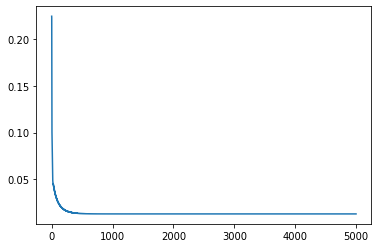

In [11]:
# Return J for every epoch and Plot it against # of epochs.
n_epoch = 5000 # Modify as per your model (should be in the range of 1000 - 3000)
alpha = 0.002 # Modify as per your model (should be in the range of 0.001 - 0.1)
theta_list, J_list = gradient_descent_MLR(X,train_y,alpha,n_epoch)
n_epoc_list = list(range(n_epoch))
plt.plot(n_epoc_list,J_list)

In [12]:

from sklearn.metrics import mean_squared_error
test_x = np.insert(test_x,0,1,axis = 1)
# Use this function to calculate mean_squared_error of your test set.
theta_list, J_list = gradient_descent_MLR(test_x,test_y,alpha,n_epoch)
list_plot = list()
for i in range(0,len(test_x)):
    list_plot.append(h_x_MLR(test_x[i],theta_list))
mean_squared_error(test_y,list_plot)

0.007915605211294766